# Data Preprocessing

# The Dataset

The dataset consisted of 1376 images, 690 face images with masks and 686 without masks. The original dataset is prepared by [Prajna Bhandary](https://www.linkedin.com/in/prajna-bhandary-0b03a416a/) and available at [Github](https://github.com/prajnasb/observations/tree/master/experiements/data)


In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


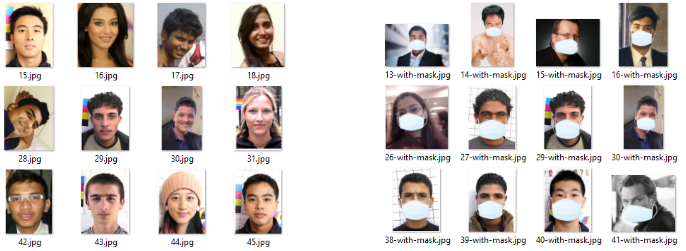

In [2]:
import PIL
from PIL import Image
img=Image.open(r'C:\Users\yugan\Downloads\download (23).png')
img

# Data Preprocessing

In [3]:
import cv2,os

data_path='Downloads/observations-master/observations-master/experiements/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [4]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            #Coverting the image into gray scale
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            resized=cv2.resize(gray,(img_size,img_size))
            #appending the image 
            data.append(resized)
            #appending the labels of category i.e. 0 & 1 in target
            target.append(label_dict[category])
            
        #if any exception rasied, the exception will be printed here. And pass to the next image
        except Exception as e:
            print('Exception:',e)
            

In [5]:
label_dict[category]

1

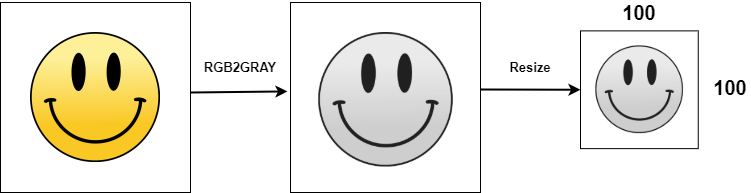

In [6]:
import PIL
from PIL import Image
img=Image.open(r'C:\Users\yugan\Downloads\download (24).png')
img

In [7]:
import numpy as np

data=np.array(data)/255.0  # normalizing the data
data=np.reshape(data,(data.shape[0],img_size,img_size,1))  #reshaping the data
target=np.array(target)

from keras.utils import np_utils
new_target=np_utils.to_categorical(target)


In [8]:
np.save('data',data)
np.save('target',new_target)

# Training the CNN

## Convolutional Neural Network Architecture

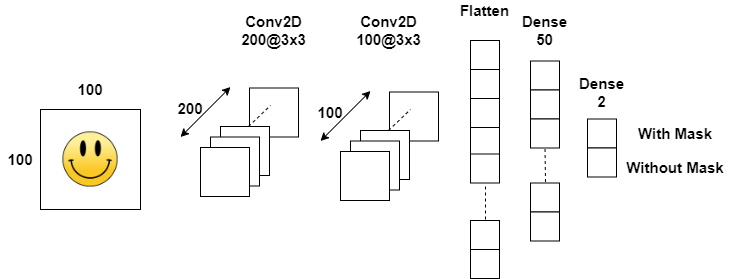

In [9]:
import PIL
from PIL import Image
img=Image.open(r'C:\Users\yugan\Downloads\download (25).png')
img

In [10]:
#loading the saved numpy arrays
import numpy as np
data=np.load('data.npy')
target=np.load('target.npy')


In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))

#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [13]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,batch_size=10,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
99/99 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.5788

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


99/99 [==============================] - 71s 709ms/step - loss: 0.6863 - accuracy: 0.5788 - val_loss: 0.5654 - val_accuracy: 0.6452
Epoch 2/20
99/99 [==============================] - ETA: 0s - loss: 0.5145 - accuracy: 0.7586

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


99/99 [==============================] - 116s 1s/step - loss: 0.5145 - accuracy: 0.7586 - val_loss: 0.4322 - val_accuracy: 0.8145
Epoch 3/20
99/99 [==============================] - ETA: 0s - loss: 0.3017 - accuracy: 0.8848

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


99/99 [==============================] - 139s 1s/step - loss: 0.3017 - accuracy: 0.8848 - val_loss: 0.3658 - val_accuracy: 0.8669
Epoch 4/20
99/99 [==============================] - ETA: 0s - loss: 0.2346 - accuracy: 0.9040

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


99/99 [==============================] - 126s 1s/step - loss: 0.2346 - accuracy: 0.9040 - val_loss: 0.1867 - val_accuracy: 0.9315
Epoch 5/20
99/99 [==============================] - ETA: 0s - loss: 0.1431 - accuracy: 0.9515

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


99/99 [==============================] - 107s 1s/step - loss: 0.1431 - accuracy: 0.9515 - val_loss: 0.1251 - val_accuracy: 0.9355
Epoch 6/20
99/99 [==============================] - 66s 668ms/step - loss: 0.1184 - accuracy: 0.9616 - val_loss: 0.1651 - val_accuracy: 0.9395
Epoch 7/20
99/99 [==============================] - ETA: 0s - loss: 0.1184 - accuracy: 0.9505

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


99/99 [==============================] - 70s 708ms/step - loss: 0.1184 - accuracy: 0.9505 - val_loss: 0.1046 - val_accuracy: 0.9718
Epoch 8/20
99/99 [==============================] - 65s 661ms/step - loss: 0.1254 - accuracy: 0.9556 - val_loss: 0.1464 - val_accuracy: 0.9355
Epoch 9/20
99/99 [==============================] - 66s 665ms/step - loss: 0.0910 - accuracy: 0.9657 - val_loss: 0.1559 - val_accuracy: 0.9315
Epoch 10/20
99/99 [==============================] - ETA: 0s - loss: 0.0970 - accuracy: 0.9657

INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


99/99 [==============================] - 67s 683ms/step - loss: 0.0970 - accuracy: 0.9657 - val_loss: 0.0934 - val_accuracy: 0.9637
Epoch 11/20
99/99 [==============================] - ETA: 0s - loss: 0.0552 - accuracy: 0.9788

INFO:tensorflow:Assets written to: model-011.model\assets


INFO:tensorflow:Assets written to: model-011.model\assets


99/99 [==============================] - 66s 666ms/step - loss: 0.0552 - accuracy: 0.9788 - val_loss: 0.0832 - val_accuracy: 0.9718
Epoch 12/20
99/99 [==============================] - ETA: 0s - loss: 0.0406 - accuracy: 0.9848

INFO:tensorflow:Assets written to: model-012.model\assets


INFO:tensorflow:Assets written to: model-012.model\assets


99/99 [==============================] - 68s 683ms/step - loss: 0.0406 - accuracy: 0.9848 - val_loss: 0.0725 - val_accuracy: 0.9718
Epoch 13/20
99/99 [==============================] - 65s 660ms/step - loss: 0.0545 - accuracy: 0.9808 - val_loss: 0.0939 - val_accuracy: 0.9677
Epoch 14/20
99/99 [==============================] - 65s 654ms/step - loss: 0.0331 - accuracy: 0.9848 - val_loss: 0.1456 - val_accuracy: 0.9556
Epoch 15/20
99/99 [==============================] - 63s 633ms/step - loss: 0.0305 - accuracy: 0.9889 - val_loss: 0.0921 - val_accuracy: 0.9556
Epoch 16/20
99/99 [==============================] - 63s 633ms/step - loss: 0.0385 - accuracy: 0.9848 - val_loss: 0.0756 - val_accuracy: 0.9637
Epoch 17/20
99/99 [==============================] - 63s 632ms/step - loss: 0.0585 - accuracy: 0.9778 - val_loss: 0.0886 - val_accuracy: 0.9637
Epoch 18/20
99/99 [==============================] - 64s 652ms/step - loss: 0.0532 - accuracy: 0.9808 - val_loss: 0.0801 - val_accuracy: 0.9637
Epoc

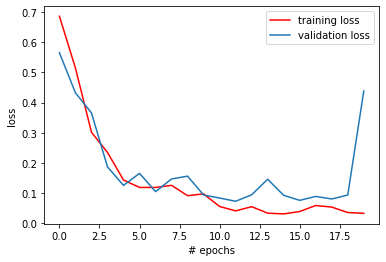

In [14]:
#plotting training & validation loss

from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

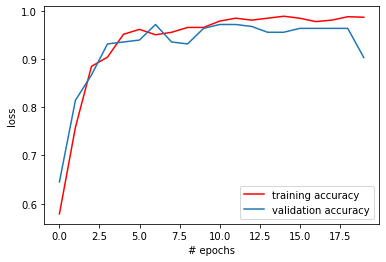

In [15]:
#plotting training & validation accuracy

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 3s 603ms/step - loss: 0.3249 - accuracy: 0.9203
[0.32492899894714355, 0.9202898740768433]


# Detecting Face with and without masks

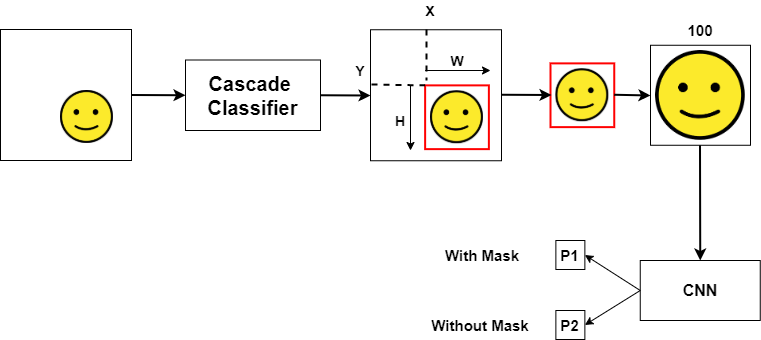

In [17]:
import PIL
from PIL import Image
img=Image.open(r'C:\Users\yugan\Downloads\detecting.png')
img

In [1]:
from keras.models import load_model
import cv2
import numpy as np

# Load the pre-trained face detector and the model for mask detection
face_clsfr = cv2.CascadeClassifier(r'C:\Users\yugan\Desktop\Face mask detection\haarcascade_frontalface_default.xml')
model=load_model('model-012.model')


# Define the labels and colors for mask/no-mask
labels_dict = {0: 'NO MASK', 1: 'MASK'}
color_dict = {0: (0, 0, 255), 1: (0, 255, 0)}

# Initialize the video capture
cap = cv2.VideoCapture(r'C:\Users\yugan\Desktop\Face mask detection\maskwearing.mp4')  # Use 0 for webcam, or provide the path to a video file

while True:
    # Read the frame from the video capture
    success, img = cap.read()
    img = cv2.resize(img, (400, 700))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_clsfr.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # Extract the region of interest
        face_img = gray[y:y + w, x:x + w]
        resized = cv2.resize(face_img, (100, 100))
        normalized = resized / 255.0               #normalized to have pixel values in the range of 0 to 1.
        reshaped = np.reshape(normalized, (1, 100, 100, 1))  # reshape to 4D

        # Perform mask detection inference
        result = model.predict(reshaped)
        label = np.argmax(result, axis=1)[0]  # determine which has the maximum probability

        # Draw bounding box and label
        cv2.rectangle(img, (x, y), (x + w, y + h), color_dict[label], 2)
        cv2.rectangle(img, (x, y - 40), (x + w, y), color_dict[label], -1)
        cv2.putText(img, labels_dict[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    cv2.imshow('LIVE', img)
    key = cv2.waitKey(1)

    if key == 27:  # Press 'Esc' key to exit
        break

cv2.destroyAllWindows()
cap.release()


1/1 [==============================] - 0s 66ms/step
